The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations.

For two-year cycles (e.g., 2015-2016), cross-sectional national samples of individuals living in the United States are invited to participate in both aspects of the data collection. The data produced are widely considered by the research community as among the most important scientific indicators of the health and well-being of the U.S. population.

For this specialization, we will be analyzing data collected from a national sample of individuals during the 2015-2016 cycle.

This notebook demonstrates application of statistics in Machine Learning using Binary Classification

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance, plot_tree

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,2.0,1,49050.06,2,132,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [5]:
df.describe(include='all')

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [6]:
df.shape

(5735, 28)

In [7]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210'], dtype='object')

### Data Visualization

### Univariate Data Exploration

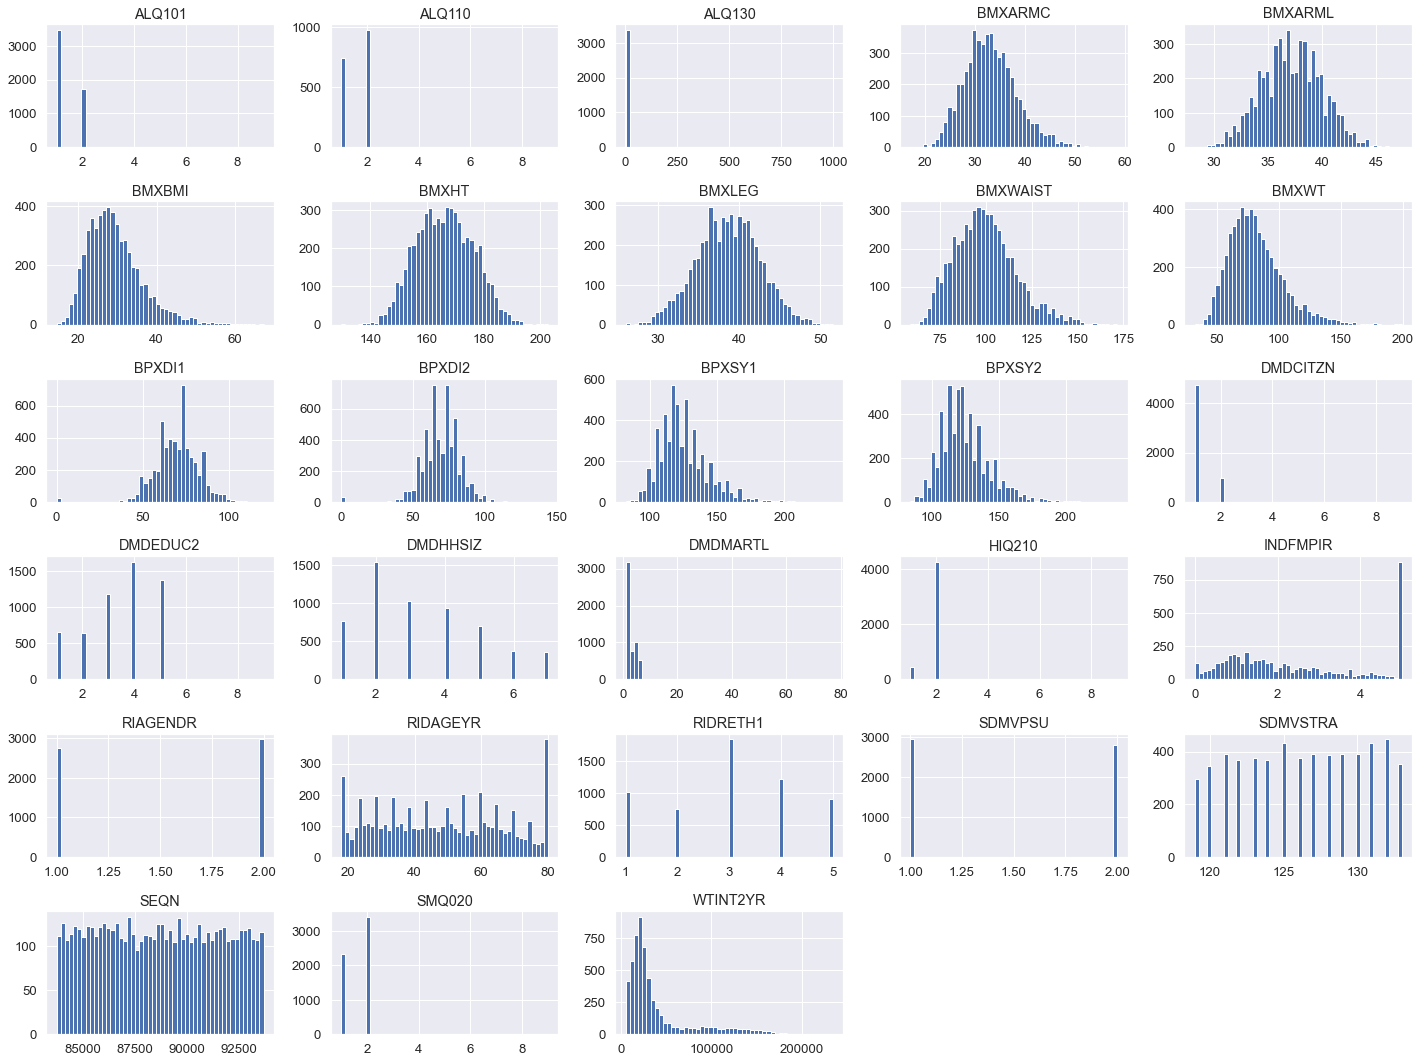

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

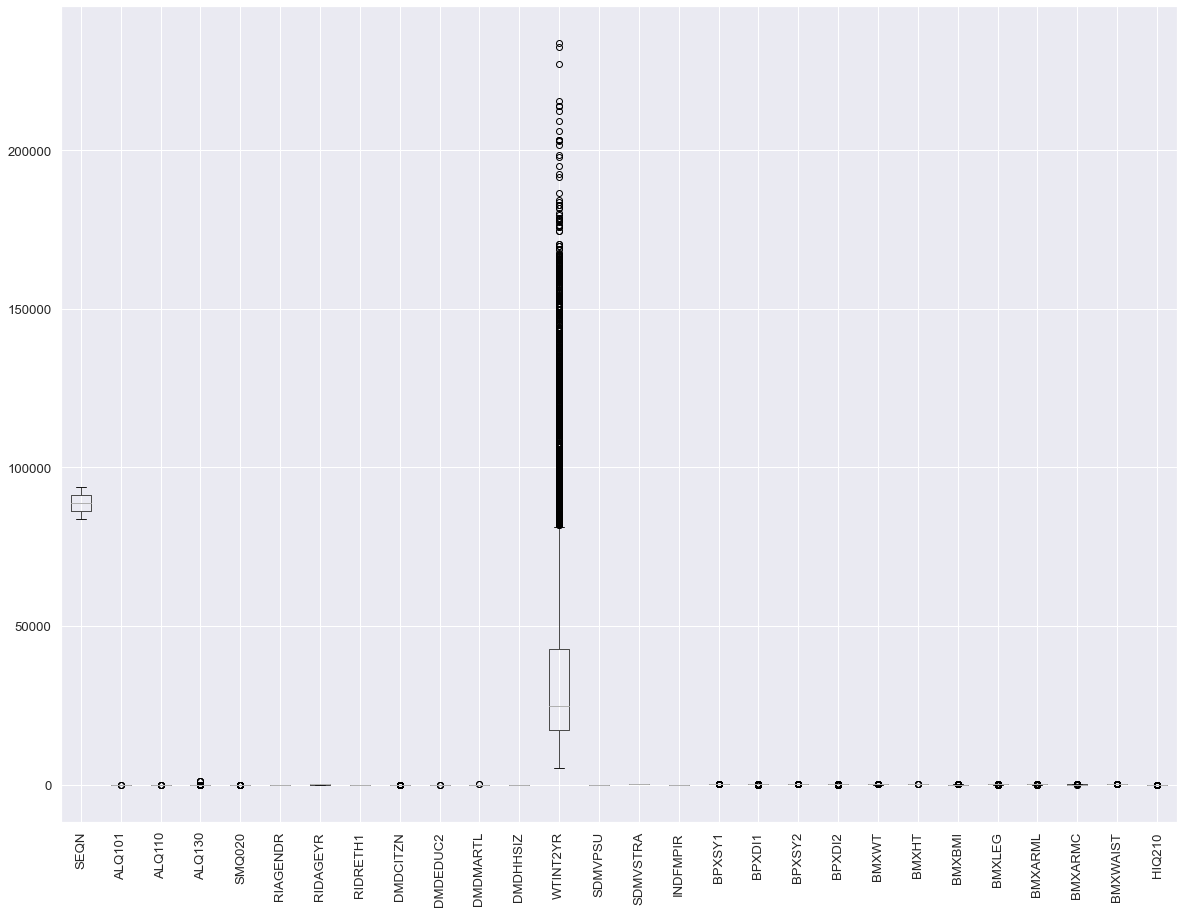

In [9]:
df.boxplot(figsize=(20,15))
plt.xticks(rotation = 90)
plt.show()

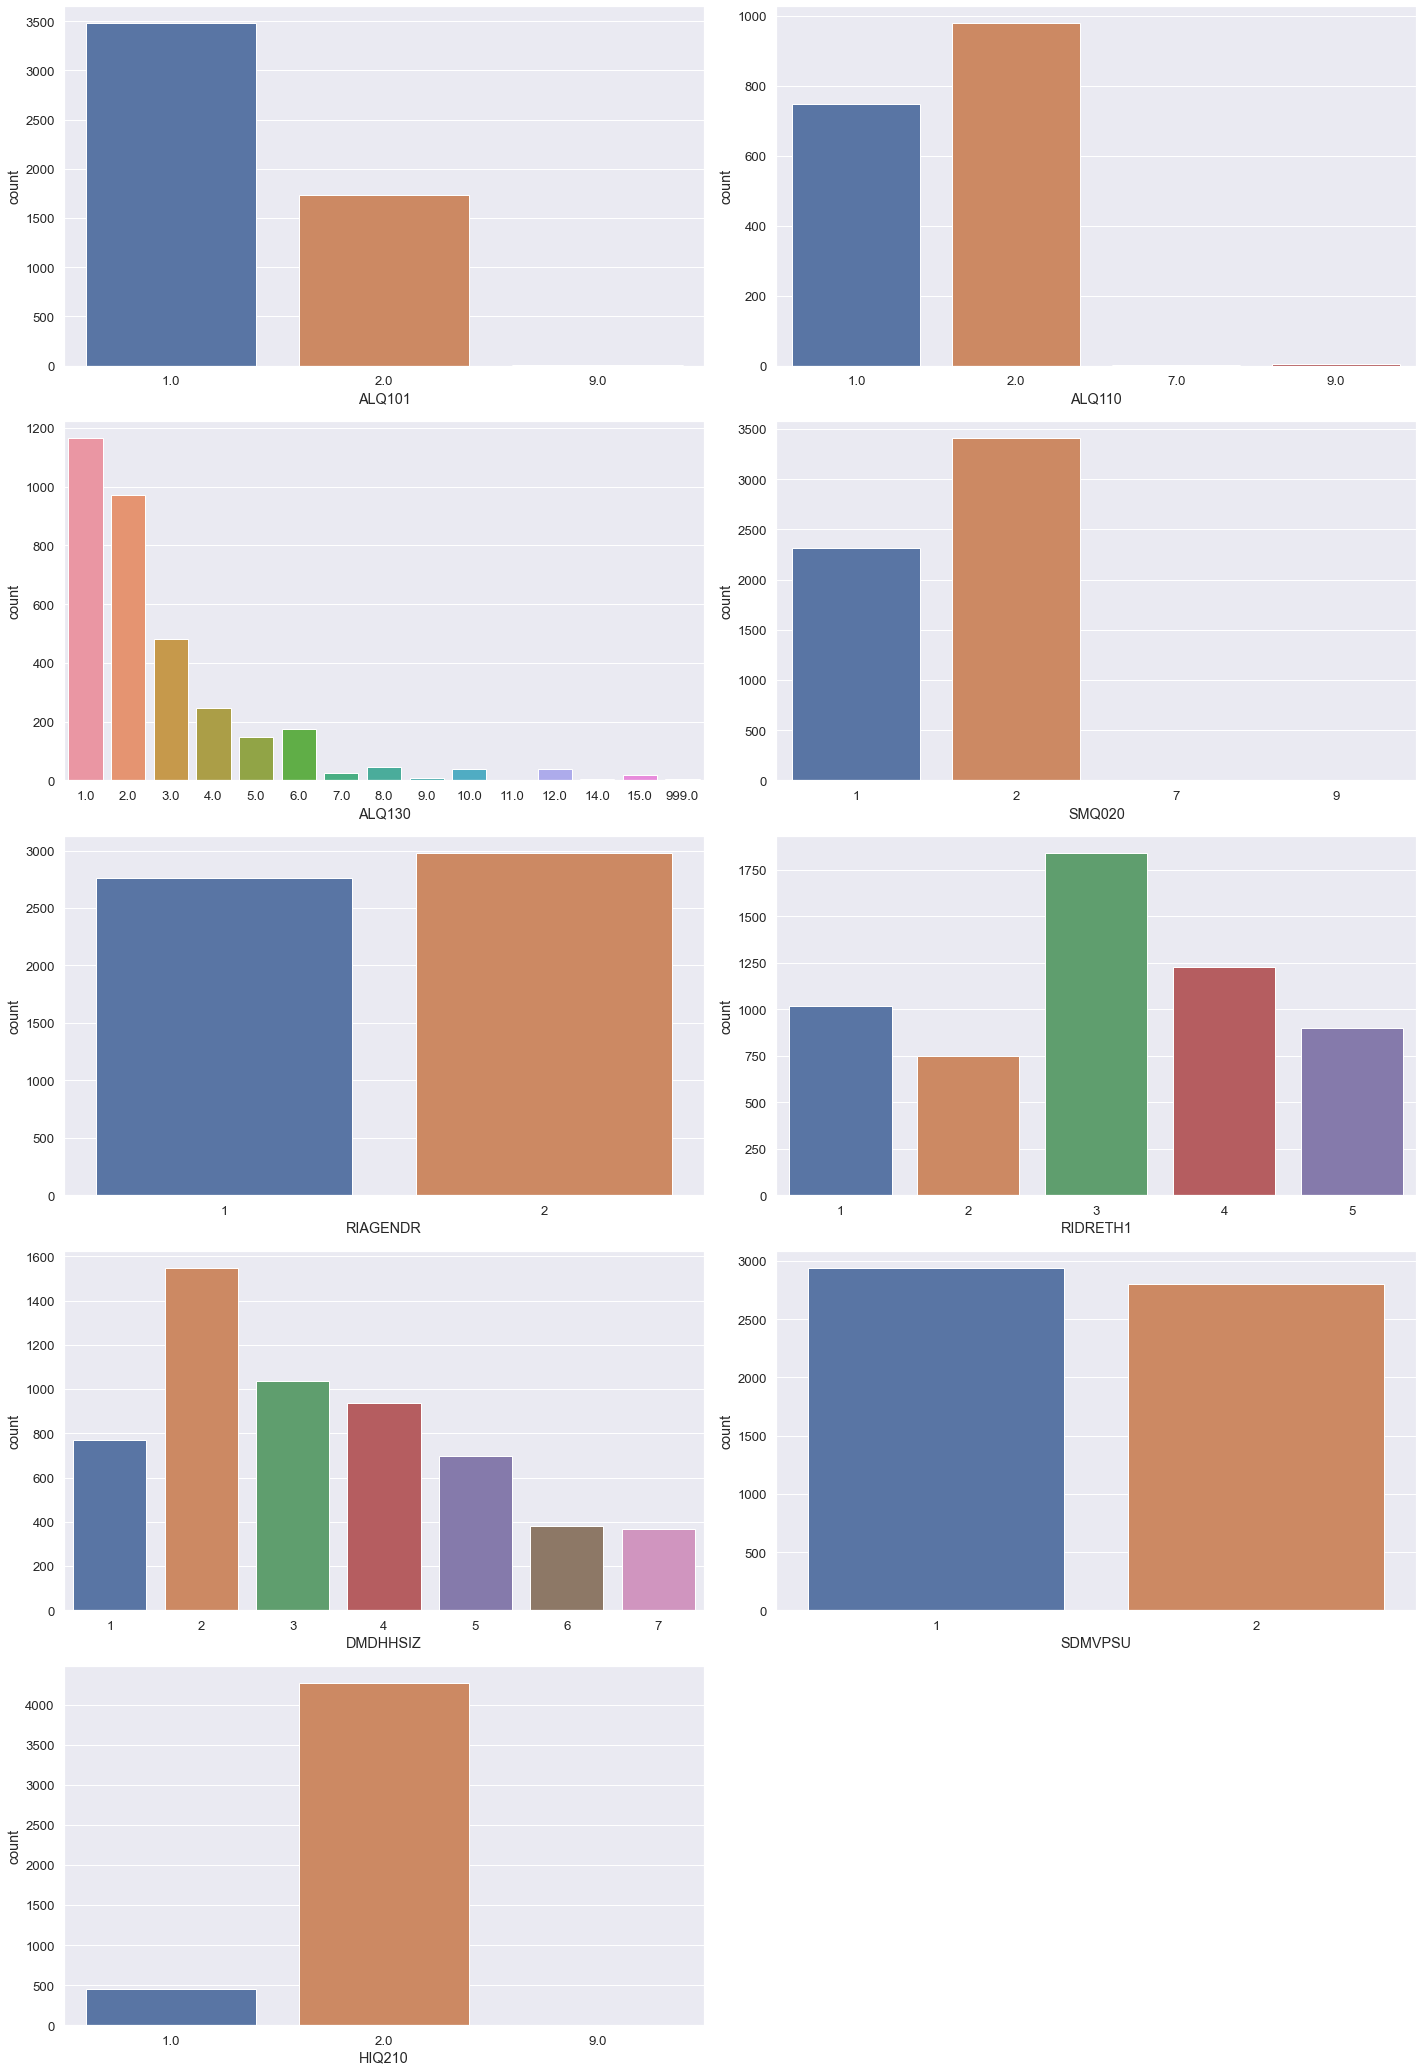

In [10]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
sns.countplot(df.ALQ101)

plt.subplot(7,2,2)
plt.title("")
sns.countplot(df.ALQ110)

plt.subplot(7,2,3)
plt.title("")
sns.countplot(df.ALQ130)

plt.subplot(7,2,4)
plt.title("")
sns.countplot(df.SMQ020)

plt.subplot(7,2,5)
plt.title("")
sns.countplot(df.RIAGENDR)

plt.subplot(7,2,6)
plt.title("")
sns.countplot(df.RIDRETH1)

plt.subplot(7,2,7)
plt.title("")
sns.countplot(df.DMDHHSIZ)

plt.subplot(7,2,8)
plt.title("")
sns.countplot(df.SDMVPSU)

plt.subplot(7,2,9)
plt.title("")
sns.countplot(df.HIQ210)

plt.tight_layout()
plt.show()

### Correlation

In [11]:
df.corr()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
SEQN,1.000000,-0.006562,-0.002206,0.021034,0.017550,-0.002453,0.001928,0.012015,-0.008718,0.015089,-0.004677,-0.024727,0.000342,-0.004062,-0.006251,0.011142,0.008902,0.005594,0.001039,0.008245,0.009078,0.005313,0.008570,0.013064,0.016829,0.011559,0.000100,-0.008177
ALQ101,-0.006562,1.000000,-0.039246,0.045931,0.224375,0.244817,0.043776,0.024871,0.087437,-0.111179,-0.050906,0.088915,-0.156842,-0.000224,0.002463,-0.124764,0.011492,-0.069583,0.011007,-0.061002,-0.102120,-0.274201,0.023780,-0.220374,-0.198496,-0.060171,-0.018680,0.038166
ALQ110,-0.002206,-0.039246,1.000000,NaN,0.295484,-0.011644,-0.030886,-0.018448,0.081828,-0.111392,-0.009649,0.062514,-0.064570,-0.030140,-0.047782,-0.104446,0.001245,-0.042326,-0.012871,-0.074995,-0.088962,-0.080150,-0.061517,-0.037318,-0.096338,-0.095476,-0.102949,0.041510
ALQ130,0.021034,0.045931,NaN,1.000000,-0.012636,-0.031485,0.003097,0.016002,0.012860,-0.041795,0.014880,-0.012428,-0.027818,0.012380,-0.012612,-0.029824,-0.011648,0.000658,-0.023374,-0.001259,0.002875,0.024239,-0.008138,0.036626,0.029154,0.011710,-0.003915,0.006212
SMQ020,0.017550,0.224375,0.295484,-0.012636,1.000000,0.177643,-0.139940,0.006692,0.075463,0.091573,-0.024573,0.105990,-0.049887,-0.029157,-0.021329,0.083277,-0.098235,-0.023058,-0.087810,-0.017253,-0.091926,-0.164602,-0.021695,-0.079360,-0.166316,-0.058284,-0.101800,0.015915
RIAGENDR,-0.002453,0.244817,-0.011644,-0.031485,0.177643,1.000000,-0.014613,-0.027209,0.003889,0.028226,0.026958,0.014847,0.003722,0.007725,-0.004619,-0.041172,-0.100583,-0.095073,-0.094670,-0.082555,-0.230864,-0.667212,0.081811,-0.528197,-0.552607,-0.157442,-0.069071,-0.026879
RIDAGEYR,0.001928,0.043776,-0.030886,0.003097,-0.139940,-0.014613,1.000000,-0.042209,-0.118094,-0.140115,-0.286758,-0.363930,-0.047806,-0.011686,0.029180,0.028044,0.469233,-0.017459,0.443336,-0.053636,-0.010378,-0.144614,0.059597,-0.310151,0.023039,-0.041358,0.223114,0.080909
RIDRETH1,0.012015,0.024871,-0.018448,0.016002,0.006692,-0.027209,-0.042209,1.000000,-0.153333,0.308585,0.007986,-0.113354,0.015321,0.256500,0.054039,0.151841,-0.008399,0.079469,-0.000573,0.087175,-0.065482,0.149536,-0.155929,0.207387,0.075217,-0.088325,-0.150374,0.028450
DMDCITZN,-0.008718,0.087437,0.081828,0.012860,0.075463,0.003889,-0.118094,-0.153333,1.000000,-0.215853,-0.011805,0.179095,-0.166302,-0.051599,-0.055125,-0.154238,-0.063834,-0.007891,-0.067105,-0.003437,-0.136959,-0.147733,-0.079562,-0.121425,-0.154126,-0.087352,-0.111723,-0.033559
DMDEDUC2,0.015089,-0.111179,-0.111392,-0.041795,0.091573,0.028226,-0.140115,0.308585,-0.215853,1.000000,-0.018743,-0.172849,0.264202,0.130371,0.012027,0.452827,-0.147522,0.027927,-0.131038,0.039210,0.043743,0.198037,-0.052961,0.193211,0.101462,-0.005829,-0.062220,0.009331


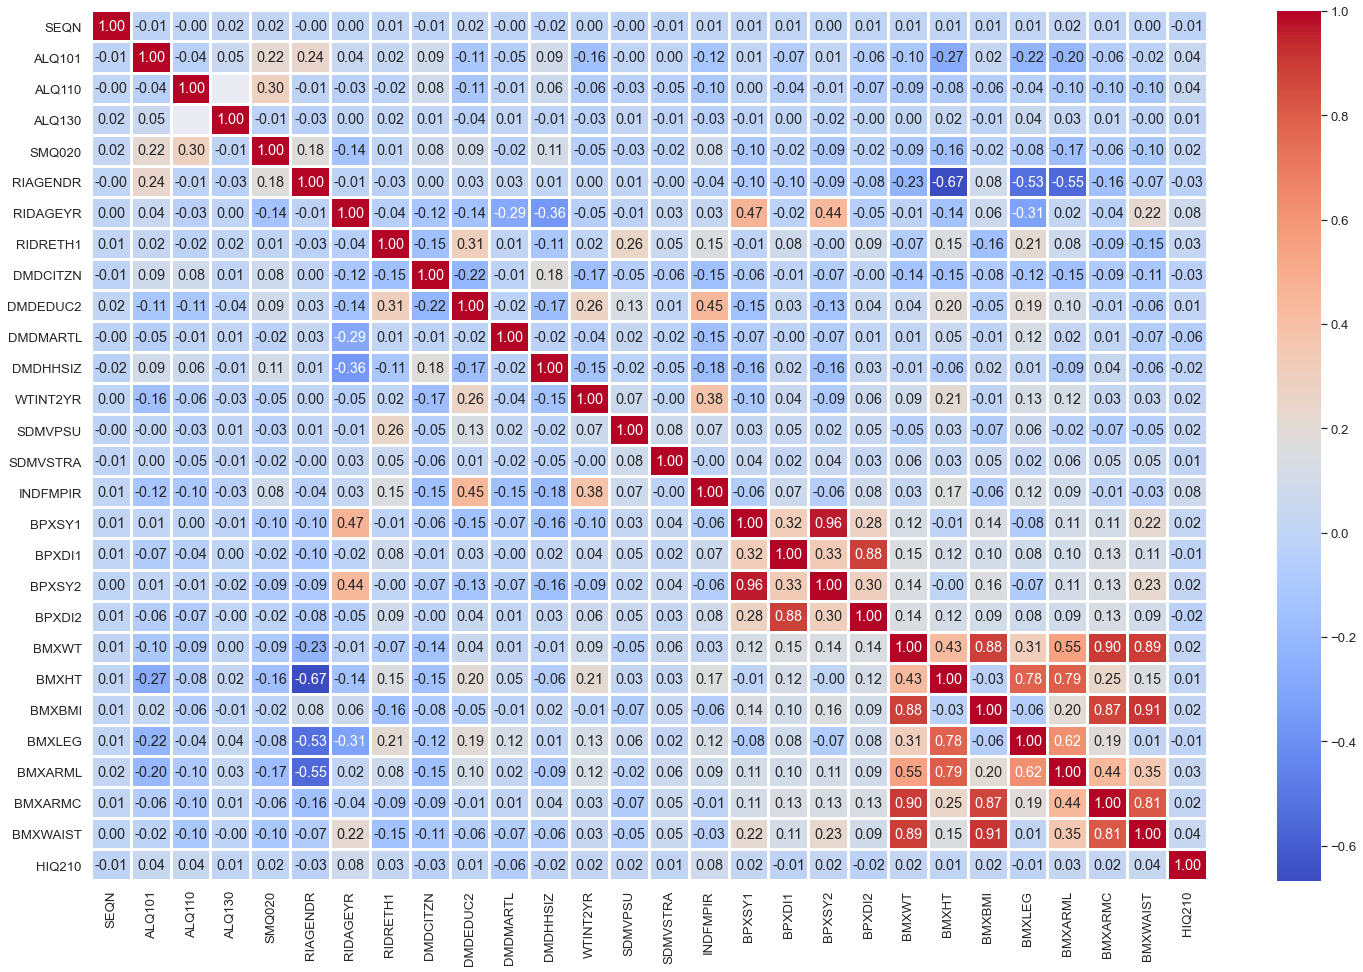

In [12]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Drop unwanted features

In [13]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210'], dtype='object')

In [14]:
df.drop(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130'],axis=1,inplace=True)

In [15]:
df

,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,1,2,80,3,1.0,4.0,2.0,1,49050.06,2,132,2.97,154.0,56.0,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


### Treat Missing Values

In [16]:
df.isnull().sum()

SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2     261
DMDMARTL     261
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df

,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
2,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
7,2,2,32,1,2.0,4.0,1.0,4,22744.36,1,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5729,2,1,25,5,2.0,5.0,5.0,7,13525.39,2,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0
5730,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5733,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [19]:
df.reset_index(inplace=True,drop=True)

In [20]:
df

,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
2,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
3,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
4,2,2,32,1,2.0,4.0,1.0,4,22744.36,1,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,2,1,25,5,2.0,5.0,5.0,7,13525.39,2,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0
3568,1,2,76,3,1.0,3.0,2.0,1,58614.08,2,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
3569,2,1,26,3,1.0,5.0,1.0,3,122920.60,1,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
3570,1,1,35,3,2.0,1.0,1.0,5,42314.29,1,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [21]:
df.isnull().sum()

SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

### Treat Data Types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    3572 non-null   int64  
 1   RIAGENDR  3572 non-null   int64  
 2   RIDAGEYR  3572 non-null   int64  
 3   RIDRETH1  3572 non-null   int64  
 4   DMDCITZN  3572 non-null   float64
 5   DMDEDUC2  3572 non-null   float64
 6   DMDMARTL  3572 non-null   float64
 7   DMDHHSIZ  3572 non-null   int64  
 8   WTINT2YR  3572 non-null   float64
 9   SDMVPSU   3572 non-null   int64  
 10  SDMVSTRA  3572 non-null   int64  
 11  INDFMPIR  3572 non-null   float64
 12  BPXSY1    3572 non-null   float64
 13  BPXDI1    3572 non-null   float64
 14  BPXSY2    3572 non-null   float64
 15  BPXDI2    3572 non-null   float64
 16  BMXWT     3572 non-null   float64
 17  BMXHT     3572 non-null   float64
 18  BMXBMI    3572 non-null   float64
 19  BMXLEG    3572 non-null   float64
 20  BMXARML   3572 non-null   floa

In [23]:
#Convert categorical features to objects first
df[['SMQ020','RIAGENDR','RIDRETH1','DMDHHSIZ','SDMVPSU']] = df[['SMQ020','RIAGENDR','RIDRETH1','DMDHHSIZ','SDMVPSU']].astype(object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    3572 non-null   object 
 1   RIAGENDR  3572 non-null   object 
 2   RIDAGEYR  3572 non-null   int64  
 3   RIDRETH1  3572 non-null   object 
 4   DMDCITZN  3572 non-null   float64
 5   DMDEDUC2  3572 non-null   float64
 6   DMDMARTL  3572 non-null   float64
 7   DMDHHSIZ  3572 non-null   object 
 8   WTINT2YR  3572 non-null   float64
 9   SDMVPSU   3572 non-null   object 
 10  SDMVSTRA  3572 non-null   int64  
 11  INDFMPIR  3572 non-null   float64
 12  BPXSY1    3572 non-null   float64
 13  BPXDI1    3572 non-null   float64
 14  BPXSY2    3572 non-null   float64
 15  BPXDI2    3572 non-null   float64
 16  BMXWT     3572 non-null   float64
 17  BMXHT     3572 non-null   float64
 18  BMXBMI    3572 non-null   float64
 19  BMXLEG    3572 non-null   float64
 20  BMXARML   3572 non-null   floa

### Treat Duplicate Values

In [25]:
df.duplicated(keep='first').sum()

0

### Perform one hot encoding

In [26]:
df2 = pd.get_dummies(df, drop_first=True)

In [27]:
df2

,RIDAGEYR,DMDCITZN,DMDEDUC2,DMDMARTL,WTINT2YR,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020_2,SMQ020_9,RIAGENDR_2,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,DMDHHSIZ_2,DMDHHSIZ_3,DMDHHSIZ_4,DMDHHSIZ_5,DMDHHSIZ_6,DMDHHSIZ_7,SDMVPSU_2
0,62,1.0,5.0,1.0,134671.37,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,78,1.0,3.0,1.0,12400.01,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,56,1.0,5.0,6.0,102718.00,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,42,1.0,4.0,3.0,17627.67,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
4,32,2.0,4.0,1.0,22744.36,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,25,2.0,5.0,5.0,13525.39,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
3568,76,1.0,3.0,2.0,58614.08,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3569,26,1.0,5.0,1.0,122920.60,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3570,35,2.0,1.0,1.0,42314.29,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [28]:
df2.columns

Index(['RIDAGEYR', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'WTINT2YR', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210', 'SMQ020_2', 'SMQ020_9', 'RIAGENDR_2', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'DMDHHSIZ_2', 'DMDHHSIZ_3', 'DMDHHSIZ_4', 'DMDHHSIZ_5', 'DMDHHSIZ_6', 'DMDHHSIZ_7', 'SDMVPSU_2'], dtype='object')

In [29]:
df2 = df2[['RIDAGEYR', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'WTINT2YR', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 
           'BMXARML', 'BMXARMC', 'BMXWAIST', 'SMQ020_2', 'SMQ020_9', 'RIAGENDR_2', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'DMDHHSIZ_2', 'DMDHHSIZ_3', 'DMDHHSIZ_4', 
           'DMDHHSIZ_5', 'DMDHHSIZ_6', 'DMDHHSIZ_7', 'SDMVPSU_2','HIQ210']]

In [30]:
df2

,RIDAGEYR,DMDCITZN,DMDEDUC2,DMDMARTL,WTINT2YR,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,SMQ020_2,SMQ020_9,RIAGENDR_2,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,DMDHHSIZ_2,DMDHHSIZ_3,DMDHHSIZ_4,DMDHHSIZ_5,DMDHHSIZ_6,DMDHHSIZ_7,SDMVPSU_2,HIQ210
0,62,1.0,5.0,1.0,134671.37,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.0
1,78,1.0,3.0,1.0,12400.01,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.0
2,56,1.0,5.0,6.0,102718.00,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,2.0
3,42,1.0,4.0,3.0,17627.67,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,1,0,1,0,0,1,0,0,0,0,1,0,0,1,2.0
4,32,2.0,4.0,1.0,22744.36,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,25,2.0,5.0,5.0,13525.39,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,1,0,0,0,0,0,1,0,0,0,0,0,1,1,2.0
3568,76,1.0,3.0,2.0,58614.08,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2.0
3569,26,1.0,5.0,1.0,122920.60,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2.0
3570,35,2.0,1.0,1.0,42314.29,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2.0


In [31]:
df2["HIQ210"].value_counts()

2.0    3196
1.0     374
9.0       2
Name: HIQ210, dtype: int64

In [32]:
df3 = df2[df2["HIQ210"]!=9.0]

In [33]:
df3

,RIDAGEYR,DMDCITZN,DMDEDUC2,DMDMARTL,WTINT2YR,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,SMQ020_2,SMQ020_9,RIAGENDR_2,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,DMDHHSIZ_2,DMDHHSIZ_3,DMDHHSIZ_4,DMDHHSIZ_5,DMDHHSIZ_6,DMDHHSIZ_7,SDMVPSU_2,HIQ210
0,62,1.0,5.0,1.0,134671.37,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.0
1,78,1.0,3.0,1.0,12400.01,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2.0
2,56,1.0,5.0,6.0,102718.00,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,2.0
3,42,1.0,4.0,3.0,17627.67,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,1,0,1,0,0,1,0,0,0,0,1,0,0,1,2.0
4,32,2.0,4.0,1.0,22744.36,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,25,2.0,5.0,5.0,13525.39,133,1.59,112.0,80.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,1,0,0,0,0,0,1,0,0,0,0,0,1,1,2.0
3568,76,1.0,3.0,2.0,58614.08,130,1.43,112.0,48.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2.0
3569,26,1.0,5.0,1.0,122920.60,121,2.99,118.0,68.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2.0
3570,35,2.0,1.0,1.0,42314.29,126,0.00,104.0,62.0,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2.0


In [34]:
df3["HIQ210"].value_counts()

2.0    3196
1.0     374
Name: HIQ210, dtype: int64

### Create and save processed dataset

In [35]:
df3.to_csv("nhnestrain.csv",index=False)

In [36]:
df3.shape

(3570, 33)

### Train Test Split

In [37]:
X = df3.iloc[:,0:32]
y = df3.iloc[:,32]

### Treat Imbalance Data

In [38]:
y.value_counts()

2.0    3196
1.0     374
Name: HIQ210, dtype: int64

In [39]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [40]:
new_X, new_y = ros.fit_resample(X, y)

In [41]:
new_y.value_counts()

1.0    3196
2.0    3196
Name: HIQ210, dtype: int64

In [42]:
new_X

,RIDAGEYR,DMDCITZN,DMDEDUC2,DMDMARTL,WTINT2YR,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,SMQ020_2,SMQ020_9,RIAGENDR_2,RIDRETH1_2,RIDRETH1_3,RIDRETH1_4,RIDRETH1_5,DMDHHSIZ_2,DMDHHSIZ_3,DMDHHSIZ_4,DMDHHSIZ_5,DMDHHSIZ_6,DMDHHSIZ_7,SDMVPSU_2
0,62,1.0,5.0,1.0,134671.37,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,78,1.0,3.0,1.0,12400.01,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,56,1.0,5.0,6.0,102718.00,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,42,1.0,4.0,3.0,17627.67,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,1,0,1,0,0,1,0,0,0,0,1,0,0,1
4,32,2.0,4.0,1.0,22744.36,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,28,1.0,4.0,6.0,71202.21,130,2.38,144.0,58.0,148.0,60.0,89.0,186.3,25.6,42.3,38.7,34.4,93.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
6388,42,1.0,3.0,3.0,27901.72,125,1.27,126.0,88.0,116.0,80.0,81.6,178.7,25.6,41.4,38.3,30.9,92.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0
6389,34,2.0,1.0,6.0,21932.06,125,0.68,124.0,74.0,112.0,74.0,78.6,154.7,32.8,35.0,37.0,33.5,99.5,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6390,80,1.0,1.0,2.0,36308.09,131,3.23,130.0,62.0,132.0,62.0,67.7,151.0,29.7,36.0,36.0,30.0,96.7,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [43]:
new_X.values, new_y.values

(array([[62.,  1.,  5., ...,  0.,  0.,  0.],
        [78.,  1.,  3., ...,  0.,  0.,  0.],
        [56.,  1.,  5., ...,  0.,  0.,  0.],
        ...,
        [34.,  2.,  1., ...,  1.,  0.,  0.],
        [80.,  1.,  1., ...,  0.,  0.,  0.],
        [22.,  1.,  4., ...,  0.,  0.,  1.]]),
 array([2., 2., 2., ..., 1., 1., 1.]))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5113, 32), (1279, 32), (5113,), (1279,))

### Feature Scaling

In [46]:
X_train

array([[55.,  2.,  3., ...,  0.,  0.,  0.],
       [23.,  1.,  5., ...,  0.,  0.,  1.],
       [23.,  1.,  5., ...,  0.,  0.,  1.],
       ...,
       [68.,  1.,  4., ...,  0.,  0.,  1.],
       [36.,  2.,  5., ...,  0.,  0.,  0.],
       [45.,  1.,  5., ...,  0.,  0.,  1.]])

In [47]:
minmax = MinMaxScaler()

In [48]:
X_train_scaled = minmax.fit_transform(X_train)

In [49]:
X_test_scaled = minmax.transform(X_test)

In [50]:
X_train_scaled

array([[0.58333333, 0.125     , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.05      , 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.05      , 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8       , 0.        , 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.26666667, 0.125     , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.41666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [51]:
X_test_scaled

array([[0.8       , 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.03333333, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18333333, 0.        , 0.375     , ..., 0.        , 0.        ,
        1.        ],
       [0.96666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.65      , 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ]])

### Model Training

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [52]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [53]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [54]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='accuracy')

In [55]:
randm.fit(new_X, new_y)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'eta': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
      

In [56]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, eta=0.25,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=900, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7999999999999999,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
randm.best_score_

0.9759062060662123

In [58]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 9,
 'gamma': 0,
 'eta': 0.25,
 'colsample_bytree': 0.7999999999999999}

### Final Tuned Model

In [59]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=900, objective='binary:logistic', eta=0.25,
                        subsample=0.8, min_child_weight=1,max_depth=9,gamma=0,colsample_bytree=0.8)

In [60]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.17983
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.12275
[2]	validation_0-error:0.11962
[3]	validation_0-error:0.12197
[4]	validation_0-error:0.10712
[5]	validation_0-error:0.10321
[6]	validation_0-error:0.09226
[7]	validation_0-error:0.08522
[8]	validation_0-error:0.08053
[9]	validation_0-error:0.07115
[10]	validation_0-error:0.06802
[11]	validation_0-error:0.06333
[12]	validation_0-error:0.05395
[13]	validation_0-error:0.04769
[14]	validation_0-error:0.04457
[15]	validation_0-error:0.03988
[16]	validation_0-error:0.03831
[17]	validation_0-error:0.03518
[18]	validation_0-error:0.02815
[19]	validation_0-error:0.02737
[20]	validation_0-error:0.02502
[21]	validation_0-error:0.02424
[22]	validation_0-error:0.02267
[23]	validation_0-error:0.02189
[24]	validation_0-error:0.02111
[25]	validation_0-error:0.02267
[26]	validation_0-error:0.02502
[27]	validation_0-error:0.02346
[28]	validation_0-error:0.02267
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.25, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred = xgbmodel.predict(X_test_scaled)

In [62]:
y_pred

array([2., 1., 2., ..., 1., 1., 1.])

### Model Evaluation

In [63]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[639,   0],
       [ 16, 624]], dtype=int64)

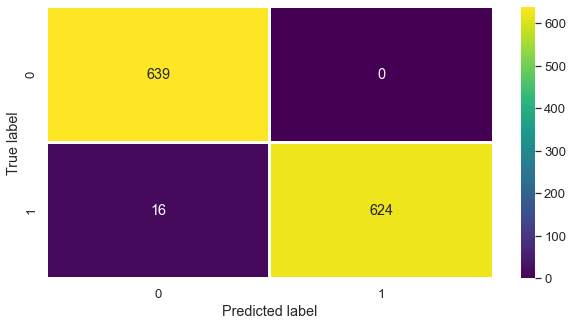

In [64]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       639
         2.0       1.00      0.97      0.99       640

    accuracy                           0.99      1279
   macro avg       0.99      0.99      0.99      1279
weighted avg       0.99      0.99      0.99      1279



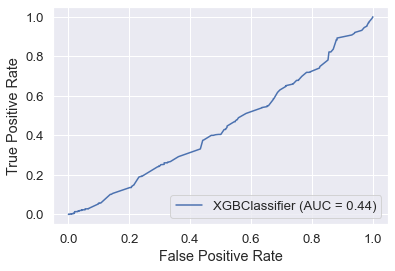

In [66]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [67]:
X.columns

Index(['RIDAGEYR', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'WTINT2YR', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'SMQ020_2', 'SMQ020_9', 'RIAGENDR_2', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'DMDHHSIZ_2', 'DMDHHSIZ_3', 'DMDHHSIZ_4', 'DMDHHSIZ_5', 'DMDHHSIZ_6', 'DMDHHSIZ_7', 'SDMVPSU_2'], dtype='object')

In [68]:
xgbmodel.get_booster().feature_names = ['RIDAGEYR', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'WTINT2YR', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'SMQ020_2', 'SMQ020_9', 'RIAGENDR_2', 'RIDRETH1_2', 'RIDRETH1_3', 'RIDRETH1_4', 'RIDRETH1_5', 'DMDHHSIZ_2', 'DMDHHSIZ_3', 'DMDHHSIZ_4', 'DMDHHSIZ_5', 'DMDHHSIZ_6', 'DMDHHSIZ_7', 'SDMVPSU_2']

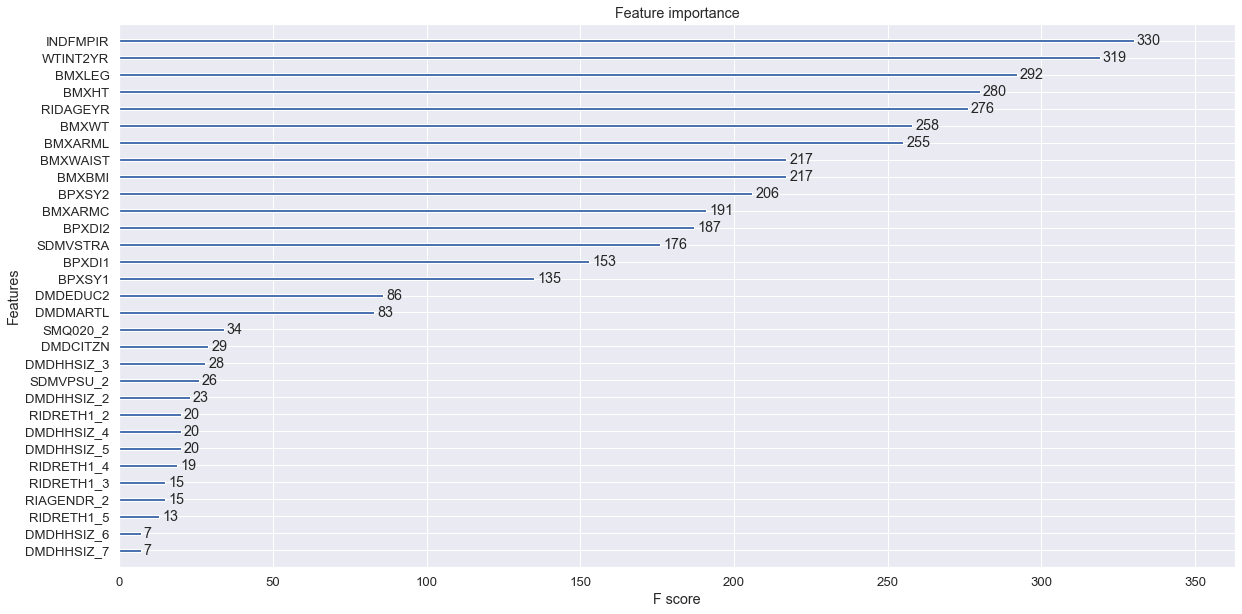

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [70]:
cv = cross_val_score(xgbmodel,new_X,new_y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.1s finished


In [71]:
cv.mean()

0.9759062060662123